## 8.Write a program to perform unsupervised K-means clustering techniques on Iris dataset

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Labels: [0. 1. 2. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 1. 1. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
Centroids: [[-0.60641634  1.90690616 -1.27526947 -1.21201901]
 [-0.79163009 

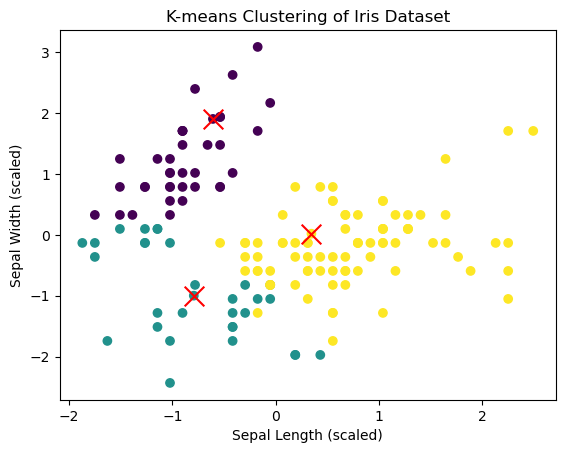

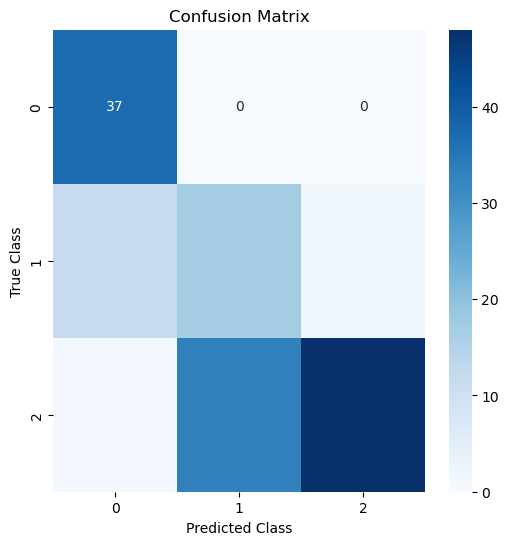

The accuracy is:  0.68


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

def kmeans(X, K):
    # Step 1: Initialize centroids with the first K samples
    centroids = X[:K]
    
    # Step 1: Assign the remaining n-K samples to the nearest centroid and update centroids
    pointsPerCentroid=[[] for _ in range(K)]
    for i in range(K, len(X)):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        nearest_centroid = np.argmin(distances)
        pointsPerCentroid[nearest_centroid].append(X[i])
        centroids[nearest_centroid] = np.mean(pointsPerCentroid[nearest_centroid],axis=0)

    labels = np.zeros(X.shape[0])
    print(labels)
    # Step 2: Assign each sample to the nearest centroid without updating centroids
    for i in range(len(X)):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        nearest_centroid = np.argmin(distances)
        labels[i] = nearest_centroid
    
    return labels, centroids

# Load the iris dataset and preprocess it
iris = load_iris()
X = iris.data
y = iris.target


# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K = 3
labels, centroids = kmeans(X_scaled, K)
print("Labels:", labels)
print("Centroids:", centroids)

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200)
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-means Clustering of Iris Dataset')
plt.show()

# Calculate and plot the confusion matrix
# the X-axis in the plot is for the predicted class and the Y-axis is for the true class. 
conf_matrix = confusion_matrix(labels, y)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

print("The accuracy is: ", accuracy_score(labels,y))